In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv("/content/retail_price.csv")  # Change to the actual file name

In [3]:
# Display first few rows
print(df.head())

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

In [4]:
# Select relevant features
features = ['qty', 'freight_price', 'product_weight_g', 'customers', 'weekend']
target = 'unit_price'  # Predicting unit price

In [6]:
# Handling missing values
df.dropna(subset=features + [target], inplace=True)
X = df[features]
y = df[target]

In [7]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [10]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 10.91
Mean Squared Error: 278.97
R² Score: 0.95


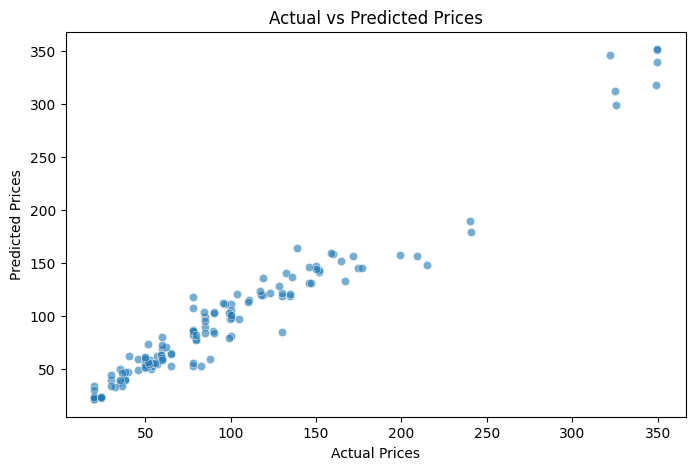

In [11]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [12]:
# -------------------------
# Interactive User Input for Prediction
# -------------------------

print("\nEnter details to predict the optimal price:")
qty = float(input("Enter quantity sold: "))  # Example: 10
freight_price = float(input("Enter freight price: "))  # Example: 5.5
product_weight_g = float(input("Enter product weight (grams): "))  # Example: 1200
customers = int(input("Enter number of customers: "))  # Example: 3
weekend = int(input("Was it sold on a weekend? (1 for Yes, 0 for No): "))  # Example: 1


Enter details to predict the optimal price:
Enter quantity sold: 10
Enter freight price: 5.5
Enter product weight (grams): 1200
Enter number of customers: 3
Was it sold on a weekend? (1 for Yes, 0 for No): 1


In [13]:
# Convert input into an array
new_data = np.array([[qty, freight_price, product_weight_g, customers, weekend]])

In [14]:
# Predict the price
predicted_price = rf_model.predict(new_data)

print(f"\nPredicted Price for the new data point: ${predicted_price[0]:.2f}")


Predicted Price for the new data point: $84.58


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
import pickle

# Train your model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Assuming X_train and y_train are already prepared

# Save the trained model
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

print("Model saved successfully!")


Model saved successfully!
